In [36]:
import pandas as pd
import numpy as np
import plotly as pl
import hvplot.pandas
import plotly.express as px




In [37]:
df = pd.read_csv("Resources\cleaned_wildfire_5.csv", index_col=[0])
df


,fire_name,fire_size,stat_cause_descr,latitude,longitude,state,discovery_month,year,putout_time,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,veg_label
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,16.275967,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,Other
9,CRAZY,1.00,Miscellaneous,48.839400,-99.718500,ND,Apr,2004,0,4.600950,...,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,Polar Desert/Rock/Ice
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,2014,0,3.490698,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270,Polar Desert/Rock/Ice
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,2007,0,-0.891635,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,0.292303,Polar Desert/Rock/Ice
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,2000,0,20.079480,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,0.162416,Open Shrubland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2015,5,2.275974,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,0.046649,Polar Desert/Rock/Ice
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,2015,10,17.007551,...,51.541802,53.945191,56.257500,49.915194,0.0,0.0,0.0,0.0,0.060013,C3 Grassland/Steppe
55349,BROWN RANCH,17831.00,Miscellaneous,30.005000,-100.391167,TX,Aug,2015,6,28.113120,...,60.470917,56.987013,58.615538,58.243619,0.0,0.0,0.0,0.0,0.451149,Open Shrubland
55350,PRICKLEY PEAR,3452.00,Miscellaneous,30.400883,-101.331933,TX,Aug,2015,2,31.270833,...,44.411268,47.176638,47.944785,39.510638,4.6,4.6,0.0,0.0,0.429604,Open Shrubland


In [38]:
df.stat_cause_descr.value_counts()


Lightning            4630
Debris Burning       2473
Miscellaneous        1958
Arson                1874
Equipment Use         796
Missing/Undefined     528
Campfire              460
Children              331
Powerline             225
Smoking               181
Fireworks             143
Railroad              121
Structure              32
Name: stat_cause_descr, dtype: int64

<AxesSubplot:>

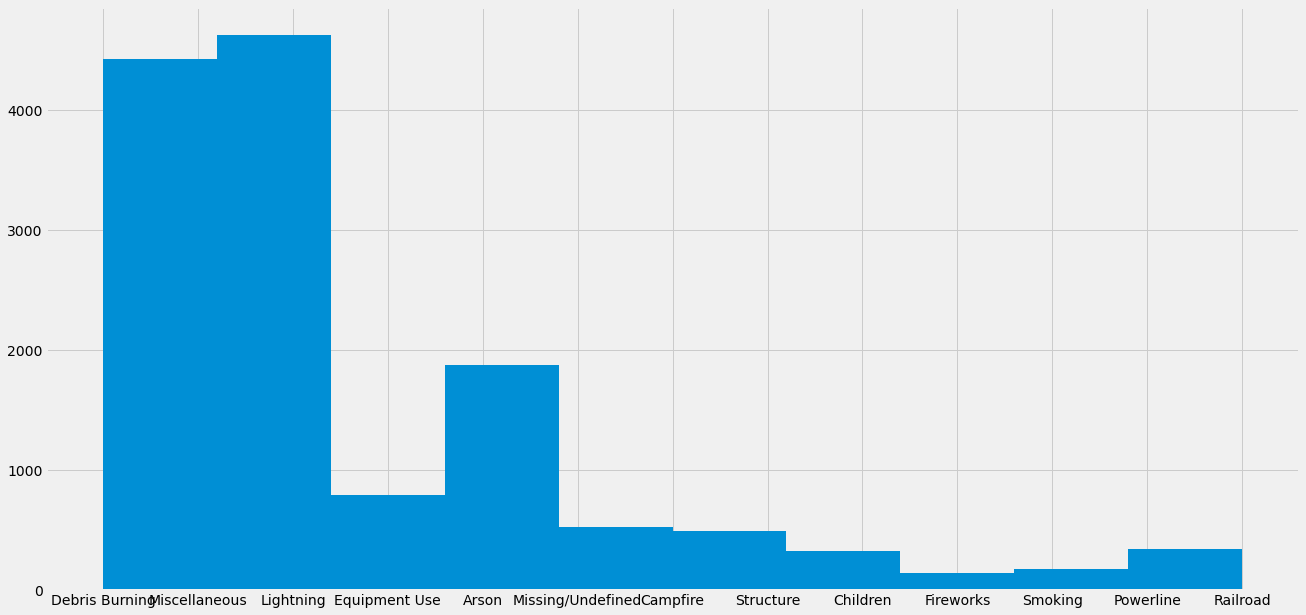

In [39]:
df.stat_cause_descr.hist(figsize=(20,10))


In [40]:
df.columns


Index(['fire_name', 'fire_size', 'stat_cause_descr', 'latitude', 'longitude',
       'state', 'discovery_month', 'year', 'putout_time', 'Temp_pre_30',
       'Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15',
       'Wind_pre_7', 'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7',
       'Hum_cont', 'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont',
       'remoteness', 'veg_label'],
      dtype='object')

In [41]:

df.loc[(df["stat_cause_descr"] == "Missing/Undefined") |
       (df["stat_cause_descr"] == "Structure") |
       (df["stat_cause_descr"] == "Miscellaneous"), "stat_cause_descr"] = "Other"

df

,fire_name,fire_size,stat_cause_descr,latitude,longitude,state,discovery_month,year,putout_time,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,veg_label
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,16.275967,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,Other
9,CRAZY,1.00,Other,48.839400,-99.718500,ND,Apr,2004,0,4.600950,...,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,Polar Desert/Rock/Ice
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,2014,0,3.490698,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270,Polar Desert/Rock/Ice
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,2007,0,-0.891635,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,0.292303,Polar Desert/Rock/Ice
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,2000,0,20.079480,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,0.162416,Open Shrubland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2015,5,2.275974,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,0.046649,Polar Desert/Rock/Ice
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,2015,10,17.007551,...,51.541802,53.945191,56.257500,49.915194,0.0,0.0,0.0,0.0,0.060013,C3 Grassland/Steppe
55349,BROWN RANCH,17831.00,Other,30.005000,-100.391167,TX,Aug,2015,6,28.113120,...,60.470917,56.987013,58.615538,58.243619,0.0,0.0,0.0,0.0,0.451149,Open Shrubland
55350,PRICKLEY PEAR,3452.00,Other,30.400883,-101.331933,TX,Aug,2015,2,31.270833,...,44.411268,47.176638,47.944785,39.510638,4.6,4.6,0.0,0.0,0.429604,Open Shrubland


In [42]:
df.loc[(df["stat_cause_descr"] == "Railroad") |
       (df["stat_cause_descr"] == "Powerline") | 
       (df["stat_cause_descr"] == "Equipment Use"), "stat_cause_descr"] = "Utilities"

df

,fire_name,fire_size,stat_cause_descr,latitude,longitude,state,discovery_month,year,putout_time,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,veg_label
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,16.275967,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,Other
9,CRAZY,1.00,Other,48.839400,-99.718500,ND,Apr,2004,0,4.600950,...,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,Polar Desert/Rock/Ice
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,2014,0,3.490698,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270,Polar Desert/Rock/Ice
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,2007,0,-0.891635,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,0.292303,Polar Desert/Rock/Ice
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,2000,0,20.079480,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,0.162416,Open Shrubland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2015,5,2.275974,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,0.046649,Polar Desert/Rock/Ice
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,2015,10,17.007551,...,51.541802,53.945191,56.257500,49.915194,0.0,0.0,0.0,0.0,0.060013,C3 Grassland/Steppe
55349,BROWN RANCH,17831.00,Other,30.005000,-100.391167,TX,Aug,2015,6,28.113120,...,60.470917,56.987013,58.615538,58.243619,0.0,0.0,0.0,0.0,0.451149,Open Shrubland
55350,PRICKLEY PEAR,3452.00,Other,30.400883,-101.331933,TX,Aug,2015,2,31.270833,...,44.411268,47.176638,47.944785,39.510638,4.6,4.6,0.0,0.0,0.429604,Open Shrubland


In [43]:
df.loc[(df["stat_cause_descr"] == "Campfire") |
       (df["stat_cause_descr"] == "Children") | 
       (df["stat_cause_descr"] == "Smoking") | 
       (df["stat_cause_descr"] == "Fireworks"), "stat_cause_descr"] = "Accidental"

df

,fire_name,fire_size,stat_cause_descr,latitude,longitude,state,discovery_month,year,putout_time,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,veg_label
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,16.275967,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,Other
9,CRAZY,1.00,Other,48.839400,-99.718500,ND,Apr,2004,0,4.600950,...,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,Polar Desert/Rock/Ice
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,2014,0,3.490698,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270,Polar Desert/Rock/Ice
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,2007,0,-0.891635,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,0.292303,Polar Desert/Rock/Ice
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,2000,0,20.079480,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,0.162416,Open Shrubland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2015,5,2.275974,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,0.046649,Polar Desert/Rock/Ice
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,2015,10,17.007551,...,51.541802,53.945191,56.257500,49.915194,0.0,0.0,0.0,0.0,0.060013,C3 Grassland/Steppe
55349,BROWN RANCH,17831.00,Other,30.005000,-100.391167,TX,Aug,2015,6,28.113120,...,60.470917,56.987013,58.615538,58.243619,0.0,0.0,0.0,0.0,0.451149,Open Shrubland
55350,PRICKLEY PEAR,3452.00,Other,30.400883,-101.331933,TX,Aug,2015,2,31.270833,...,44.411268,47.176638,47.944785,39.510638,4.6,4.6,0.0,0.0,0.429604,Open Shrubland


In [44]:
# df.loc[(df["stat_cause_descr"] == "") |
#        (df["stat_cause_descr"] == "") | 
#        (df["stat_cause_descr"] == "") | 
#        (df["stat_cause_descr"] == ""), "stat_cause_descr"] = "?"

# df

In [45]:
df.stat_cause_descr.value_counts()


Lightning         4630
Other             2518
Debris Burning    2473
Arson             1874
Utilities         1142
Accidental        1115
Name: stat_cause_descr, dtype: int64

In [46]:
df.columns

Index(['fire_name', 'fire_size', 'stat_cause_descr', 'latitude', 'longitude',
       'state', 'discovery_month', 'year', 'putout_time', 'Temp_pre_30',
       'Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15',
       'Wind_pre_7', 'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7',
       'Hum_cont', 'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont',
       'remoteness', 'veg_label'],
      dtype='object')

In [47]:
df

,fire_name,fire_size,stat_cause_descr,latitude,longitude,state,discovery_month,year,putout_time,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,veg_label
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,16.275967,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,Other
9,CRAZY,1.00,Other,48.839400,-99.718500,ND,Apr,2004,0,4.600950,...,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,Polar Desert/Rock/Ice
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,2014,0,3.490698,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270,Polar Desert/Rock/Ice
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,2007,0,-0.891635,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,0.292303,Polar Desert/Rock/Ice
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,2000,0,20.079480,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,0.162416,Open Shrubland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2015,5,2.275974,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,0.046649,Polar Desert/Rock/Ice
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,2015,10,17.007551,...,51.541802,53.945191,56.257500,49.915194,0.0,0.0,0.0,0.0,0.060013,C3 Grassland/Steppe
55349,BROWN RANCH,17831.00,Other,30.005000,-100.391167,TX,Aug,2015,6,28.113120,...,60.470917,56.987013,58.615538,58.243619,0.0,0.0,0.0,0.0,0.451149,Open Shrubland
55350,PRICKLEY PEAR,3452.00,Other,30.400883,-101.331933,TX,Aug,2015,2,31.270833,...,44.411268,47.176638,47.944785,39.510638,4.6,4.6,0.0,0.0,0.429604,Open Shrubland


In [48]:
df.rename(columns = {'stat_cause_descr':'fire_cause'}, inplace=True)
df

,fire_name,fire_size,fire_cause,latitude,longitude,state,discovery_month,year,putout_time,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,veg_label
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,16.275967,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,Other
9,CRAZY,1.00,Other,48.839400,-99.718500,ND,Apr,2004,0,4.600950,...,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,Polar Desert/Rock/Ice
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,2014,0,3.490698,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270,Polar Desert/Rock/Ice
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,2007,0,-0.891635,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,0.292303,Polar Desert/Rock/Ice
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,2000,0,20.079480,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,0.162416,Open Shrubland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2015,5,2.275974,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,0.046649,Polar Desert/Rock/Ice
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,2015,10,17.007551,...,51.541802,53.945191,56.257500,49.915194,0.0,0.0,0.0,0.0,0.060013,C3 Grassland/Steppe
55349,BROWN RANCH,17831.00,Other,30.005000,-100.391167,TX,Aug,2015,6,28.113120,...,60.470917,56.987013,58.615538,58.243619,0.0,0.0,0.0,0.0,0.451149,Open Shrubland
55350,PRICKLEY PEAR,3452.00,Other,30.400883,-101.331933,TX,Aug,2015,2,31.270833,...,44.411268,47.176638,47.944785,39.510638,4.6,4.6,0.0,0.0,0.429604,Open Shrubland


In [49]:
df


,fire_name,fire_size,fire_cause,latitude,longitude,state,discovery_month,year,putout_time,Temp_pre_30,...,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,veg_label
3,WNA 1,1.00,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,16.275967,...,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,Other
9,CRAZY,1.00,Other,48.839400,-99.718500,ND,Apr,2004,0,4.600950,...,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,Polar Desert/Rock/Ice
26,STO3573155,2.00,Debris Burning,35.718900,-92.335000,AR,Jan,2014,0,3.490698,...,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270,Polar Desert/Rock/Ice
31,AXE RONDEAU,1.20,Debris Burning,48.833000,-99.783600,ND,Apr,2007,0,-0.891635,...,77.575012,75.963981,71.173116,0.000000,21.2,21.2,9.2,0.0,0.292303,Polar Desert/Rock/Ice
35,FY2001-EARLY-021,30.18,Debris Burning,31.259000,-84.895600,GA,Oct,2000,0,20.079480,...,67.551783,61.733788,60.328571,0.000000,0.0,0.0,0.0,0.0,0.162416,Open Shrubland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55342,PINECREST,5086.00,Debris Burning,45.656100,-109.114200,MT,Mar,2015,5,2.275974,...,51.676681,46.933399,42.638384,28.844444,0.0,0.0,0.0,0.0,0.046649,Polar Desert/Rock/Ice
55343,WALKER,5963.00,Debris Burning,43.785671,-115.985922,ID,Oct,2015,10,17.007551,...,51.541802,53.945191,56.257500,49.915194,0.0,0.0,0.0,0.0,0.060013,C3 Grassland/Steppe
55349,BROWN RANCH,17831.00,Other,30.005000,-100.391167,TX,Aug,2015,6,28.113120,...,60.470917,56.987013,58.615538,58.243619,0.0,0.0,0.0,0.0,0.451149,Open Shrubland
55350,PRICKLEY PEAR,3452.00,Other,30.400883,-101.331933,TX,Aug,2015,2,31.270833,...,44.411268,47.176638,47.944785,39.510638,4.6,4.6,0.0,0.0,0.429604,Open Shrubland


In [50]:
df.to_csv("cleaned_wildfire_6.csv")

In [52]:


df30 = df[['fire_name', 'fire_size', 'fire_cause', 'latitude',
                 'longitude', 'state', 'discovery_month', 'putout_time', 'veg_label',
                 'Temp_pre_30', 'Wind_pre_30',
                'Hum_pre_30', 'Prec_pre_30',
                 'remoteness', 'year']]
df30.to_csv("Resources/df30.csv")


In [53]:
df15 = df[['fire_name', 'fire_size', 'fire_cause', 'latitude',
           'longitude', 'state', 'discovery_month', 'putout_time', 'veg_label',
           'Temp_pre_15', 'Wind_pre_15',
           'Hum_pre_15', 'Prec_pre_15',
           'remoteness', 'year']]
df15.to_csv("Resources/df15.csv")


In [54]:
df7 = df[['fire_name', 'fire_size', 'fire_cause', 'latitude',
           'longitude', 'state', 'discovery_month', 'putout_time', 'veg_label',
           'Temp_pre_7', 'Wind_pre_7',
           'Hum_pre_7', 'Prec_pre_7',
           'remoteness', 'year']]
df7.to_csv("Resources/df7.csv")


In [55]:

dfcont = df[['fire_name', 'fire_size', 'fire_cause', 'latitude',
           'longitude', 'state', 'discovery_month', 'putout_time', 'veg_label',
             'Temp_cont', 'Wind_cont',
             'Hum_cont', 'Prec_cont',
           'remoteness', 'year']]
dfcont.to_csv("Resources/dfcont.csv")


In [56]:
dfFireInfo = df[['fire_name', 'fire_size']]
dfFireInfo.to_csv("Resources/dfFireInfo.csv")


In [57]:
vegetation_df = df[['fire_name','veg_label']]
vegetation_df.to_csv("Resources/vegetation_df.csv")


In [58]:
location_df = df[['fire_name', 'latitude', 'longitude', 'state', 'remoteness']]
location_df.to_csv("Resources/location_df.csv")



In [59]:
fire_duration = df[['fire_name', 'discovery_month', 'putout_time','year']]
fire_duration.to_csv("Resources/fire_duration.csv")


In [60]:
fire_cause_df = df[['fire_name', 'fire_cause']]
fire_cause_df.to_csv("Resources/fire_cause_df.csv")


In [61]:
df.fire_cause.value_counts()


Lightning         4630
Other             2518
Debris Burning    2473
Arson             1874
Utilities         1142
Accidental        1115
Name: fire_cause, dtype: int64

In [62]:
df.describe()

,fire_size,latitude,longitude,year,putout_time,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,...,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000
mean,6026.228506,39.431292,-104.330353,2006.222295,9.080861,15.497647,15.831886,16.118048,8.523244,2.964216,...,1.318552,49.018474,46.433341,44.769582,18.123982,21.972964,10.067263,4.273437,2.060813,0.287644
std,25273.339231,8.089858,17.740081,6.532686,23.494287,9.178874,9.355232,9.547945,10.988010,1.453844,...,1.867181,23.002335,23.891454,24.210330,25.005843,64.951748,38.342281,22.969358,13.485607,0.173181
min,0.510000,17.983333,-165.116700,1992.000000,0.000000,-14.160823,-16.932091,-20.846104,-22.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000549
25%,2.000000,33.815131,-115.768000,2001.000000,0.000000,8.702252,8.951480,9.124250,0.000000,2.147573,...,0.000000,36.126559,32.019236,29.888242,0.000000,0.000000,0.000000,0.000000,0.000000,0.144517
50%,10.000000,37.504444,-105.468622,2007.000000,0.000000,16.757257,17.126188,17.512275,0.000000,2.962353,...,0.000000,55.105474,52.317036,49.713421,0.000000,0.300000,0.000000,0.000000,0.000000,0.253605
75%,3400.000000,43.622900,-89.247247,2012.000000,4.000000,22.710381,23.189080,23.699485,19.028720,3.879795,...,2.646194,67.041667,65.362143,64.060158,38.538759,18.800000,5.600000,0.600000,0.000000,0.413303
max,538049.000000,69.047200,-67.066666,2015.000000,371.000000,46.600000,51.567797,55.000000,55.000000,29.800000,...,24.200000,94.000000,94.000000,94.000000,92.000000,1816.000000,1273.000000,1187.000000,562.000000,0.988892


In [63]:
# df = px.data.df()
# fig = px.box(df, y="Vegetation")
# fig.show()

<AxesSubplot:>

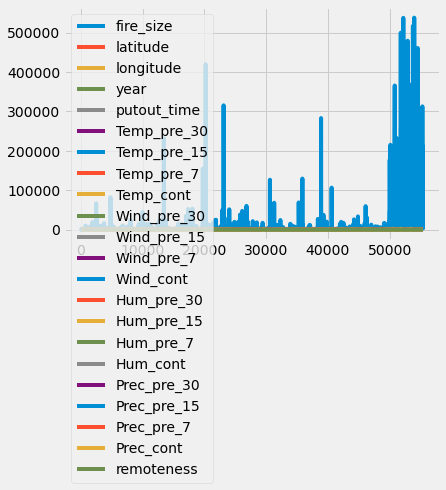

In [64]:
df.plot()

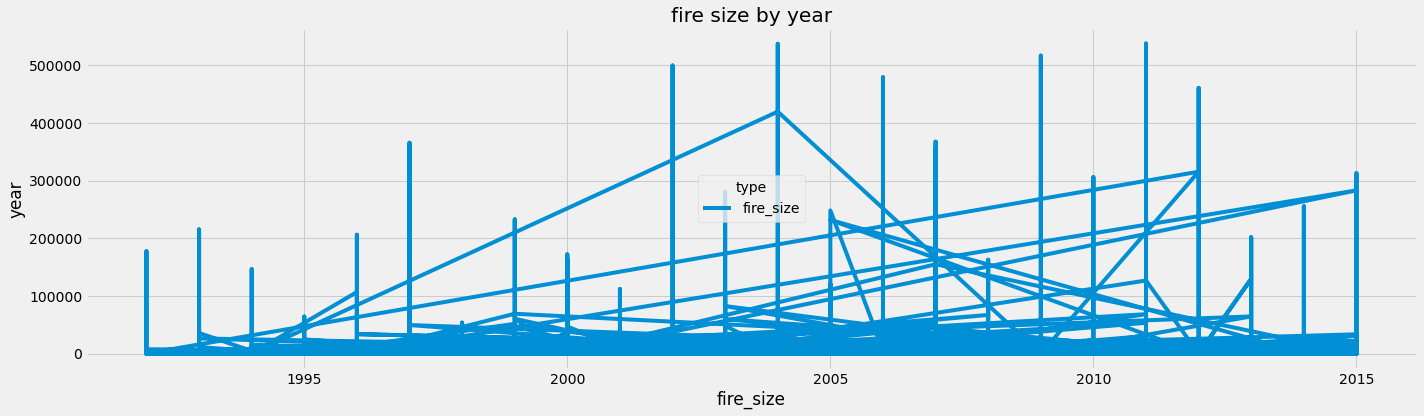

In [65]:
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
%matplotlib inline

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig,ax = plt.subplots()
df.plot(x='year', y='fire_size', figsize = (20,6), ax=ax)
ax.set_title("fire size by year")
ax.set_xlabel("fire_size")
ax.set_ylabel("year")
ax.legend(title = "type", loc = "center")
plt.tight_layout()
#the chart is saved to analysis folder
#plt.savefig("analysis/PyBer_fare_summary.png")

#show chart

plt.show()

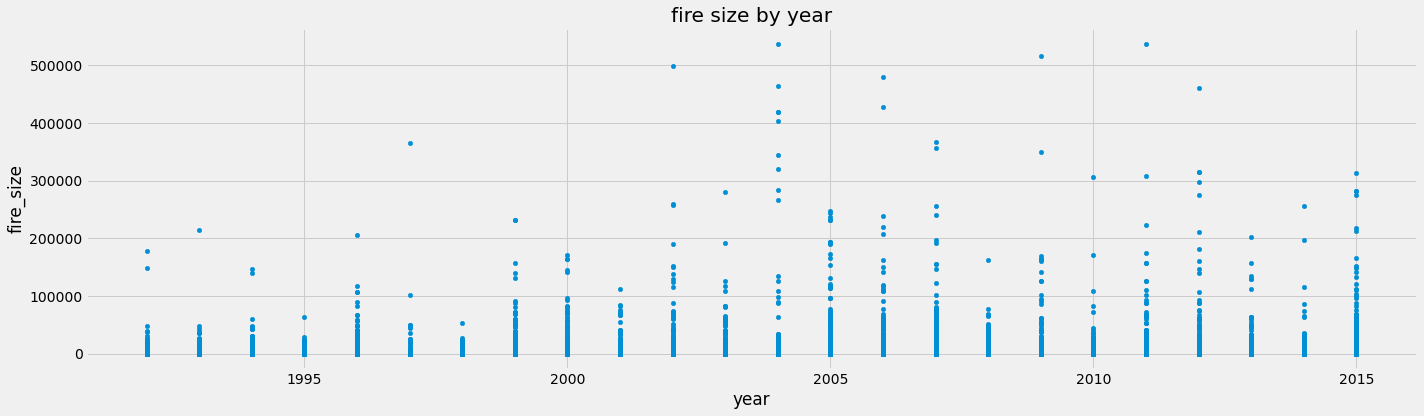

In [66]:
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
%matplotlib inline


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig,ax = plt.subplots()
df.plot(x='year', y='fire_size', kind='scatter', figsize = (20,6), ax=ax)
ax.set_title("fire size by year")
ax.set_xlabel("year")
ax.set_ylabel("fire_size")
#ax.legend(title = "type", loc = "center")
plt.tight_layout()
#the chart is saved to analysis folder
#plt.savefig("analysis/PyBer_fare_summary.png")

#show chart

plt.show()

KeyError: 'Vegetation'

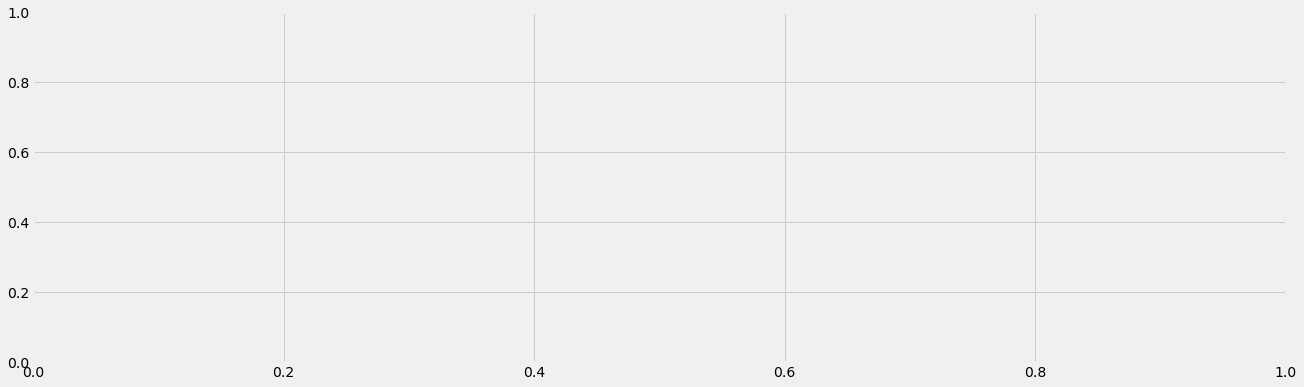

In [67]:
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
%matplotlib inline


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig,ax = plt.subplots()
df.plot(x='Vegetation', y='fire_size', kind='scatter', figsize = (20,6), ax=ax)
ax.set_title("fire size by year")
ax.set_xlabel("Vegetation")
ax.set_ylabel("fire_size")
#ax.legend(title = "type", loc = "center")
plt.tight_layout()
#the chart is saved to analysis folder
#plt.savefig("analysis/PyBer_fare_summary.png")

#show chart

plt.show()

KeyError: 'stat_cause_descr'

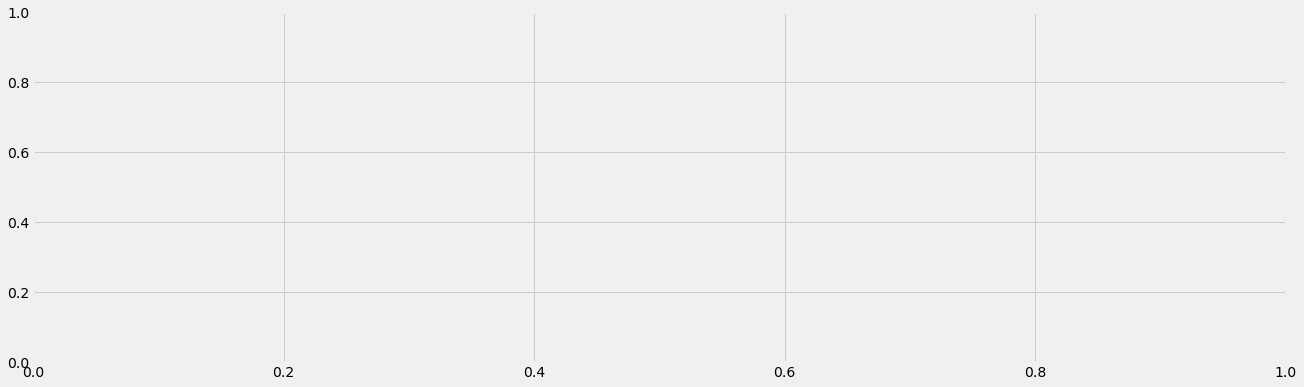

In [68]:
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
%matplotlib inline


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig,ax = plt.subplots()
df.plot(x='fire_size', y='stat_cause_descr', kind='scatter', figsize = (20,6), ax=ax)
ax.set_title("fire size by year")
ax.set_xlabel("fire_size")
ax.set_ylabel("stat_cause_descr")
#ax.legend(title = "type", loc = "center")
plt.tight_layout()
#the chart is saved to analysis folder
#plt.savefig("analysis/PyBer_fare_summary.png")

#show chart

plt.show()

KeyError: 'lightning'

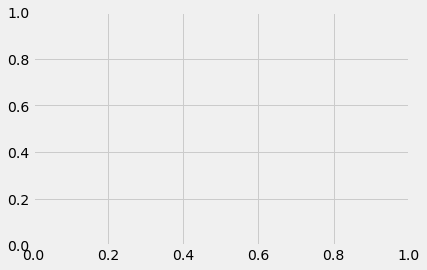

In [69]:
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style
%matplotlib inline


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig,ax = plt.subplots()
df.plot(x='fire_size', y='lightning', kind='bar', figsize = (20,6), ax=ax)
ax.set_title("fire size by year")
ax.set_xlabel("fire_size")
ax.set_ylabel("stat_cause_descr")
#ax.legend(title = "type", loc = "center")
plt.tight_layout()
#the chart is saved to analysis folder
#plt.savefig("analysis/PyBer_fare_summary.png")

#show chart

plt.show()